# Exploring Hero Presence in Disney's Top-Grossing Movies by Carol Wu

# Introduction

## Question(s) of interests
Disney has a rich history of creating beloved characters that resonate with audiences worldwide. These characters often play a crucial role in driving box office success. It would be interesting to explore how the presence of a hero affects a movie's financial performance, especially when it comes to marketing and character development.

This project aims to find out whether top-grossing movies tend to feature a hero. Specifically, I expect that **top-grossing movies are more likely to feature heroes**, as heroic characters often attract larger audiences and generate excitement around the movie.

## Dataset description 

Disney, known as The Walt Disney Company, is a leading global entertainment conglomerate founded by Walt Disney and Roy O. Disney in 1923. Disney's influence extends into various media, including music, merchandise, and licensing, making it a key player in the entertainment industry. 

The Disney dataset is composed of $5$ tables, `disney_movies_total_gross.csv`,`disney_revenue_1991-2016.csv`,`disney-characters.csv`,`disney-director.csv` and `disney-voice-actors.csv`. Each table is stored in a `.csv` file and contain different information about Disney's revenue, actors, directors, box office success etc. In this analysis, I will be using the `disney_movies_total_gross.csv` and `disney-characters.csv` tables formally described below:

* **disney_movies_total_gross.csv**
    * This file contains information on disney movies, including movie title, release date, genre, MPAA rating, total gross and inflation_adjusted gross. 
* **disney-characters.csv**
    * This file includes information on disney movie characters, including movie title, release date, hero, vilian, and song.

# Methods and Results 

In [20]:
# import all the required libraries needed for this analysis
import pandas as pd
import altair as alt

# import all the required files
movie_revenue = pd.read_csv('disney_movies_total_gross.csv')
characters = pd.read_csv('disney-characters.csv')

Let's see what the tables look like.

In [21]:
movie_revenue.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052"
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808"
3,Song of the South,"Nov 12, 1946",Adventure,G,"$65,000,000","$1,078,510,579"
4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730"


In [22]:
characters.head()

,movie_title,release_date,hero,villian,song
0,\nSnow White and the Seven Dwarfs,"December 21, 1937",Snow White,Evil Queen,Some Day My Prince Will Come
1,\nPinocchio,"February 7, 1940",Pinocchio,Stromboli,When You Wish upon a Star
2,\nFantasia,"November 13, 1940",NaN,Chernabog,NaN
3,Dumbo,"October 23, 1941",Dumbo,Ringmaster,Baby Mine
4,\nBambi,"August 13, 1942",Bambi,Hunter,Love Is a Song


Let's get some information about the revenue table.

In [23]:
movie_revenue.info()
print(movie_revenue['movie_title'].dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   MPAA_rating               523 non-null    object
 4   total_gross               579 non-null    object
 5   inflation_adjusted_gross  579 non-null    object
dtypes: object(6)
memory usage: 13.6+ KB
object


The revenue table has $579$ rows and $6$ columns. Each observation includes the **movie_title**, **release_date**, **genre**, **MPAA rating**, **total gross**, and **inflation adjusted gross**.

Let's get some other information about the character table.

In [24]:
characters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie_title   56 non-null     object
 1   release_date  56 non-null     object
 2   hero          52 non-null     object
 3   villian       46 non-null     object
 4   song          47 non-null     object
dtypes: object(5)
memory usage: 1.2+ KB


The characters table has $56$ rows and $5$ columns. Each observation includes the **movie_title**, **release_date**, **hero**, **villian**, and **song**.

Let's start by cleaing the **movie_revenue** table before moving on to basic visualizations.

In [25]:
# remove spaces for the movie_title column and capitalize the first letter of each word
movie_revenue['movie_title'] = movie_revenue['movie_title'].str.strip().str.title()

# convert release_date to datetime format then extract the year and store it in a new column called 'year'
movie_revenue['release_date']= pd.to_datetime(movie_revenue['release_date'])
movie_revenue['year'] = movie_revenue['release_date'].dt.year

# convert total_gross to int type 
movie_revenue['total_gross'] = movie_revenue['total_gross'].replace(r'[\$,]','', regex=True).astype(int)

movie_revenue

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,year
0,Snow White And The Seven Dwarfs,1937-12-21,Musical,G,184925485,"$5,228,953,251",1937
1,Pinocchio,1940-02-09,Adventure,G,84300000,"$2,188,229,052",1940
2,Fantasia,1940-11-13,Musical,G,83320000,"$2,187,090,808",1940
3,Song Of The South,1946-11-12,Adventure,G,65000000,"$1,078,510,579",1946
4,Cinderella,1950-02-15,Drama,G,85000000,"$920,608,730",1950
...,...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,"$12,545,979",2016
575,Queen Of Katwe,2016-09-23,Drama,PG,8874389,"$8,874,389",2016
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,"$232,532,923",2016
577,Moana,2016-11-23,Adventure,PG,246082029,"$246,082,029",2016


As the first visualization, let's examine the total revenue generated in each year. Using the **movie_reveune** table, I'll group the data by **year** then sum the **total_gross** for each year. This provides an overview of Disney's financial performance over the years.

In [26]:
# group by year and compute the total revenue for each year
revenue_by_year = pd.DataFrame(movie_revenue.groupby('year')['total_gross'].sum().sort_values(ascending=False))

# reset index to plot using altair 
revenue_by_year = revenue_by_year.reset_index()

Now that we have it in the proper format, we can generate a bar plot to visualize it.

In [27]:
# use altair to generate a bar plot
revenue_by_year_plot = alt.Chart(revenue_by_year, width=800, height=300).mark_bar().encode(
        x=alt.X('year:N', title="Year", sort='ascending'),
        y=alt.Y("total_gross:Q", title="Total revenue"),
    ).properties(title="Total revenue by year")

revenue_by_year_plot

alt.Chart(...)

The bar chart above reveals fluctuations in revenue from year to year. There are significant increases in total gross revenue starting in the **2000s**, with many years exceeding one billion dollars. Notably, Disney genearted the highest revenue in **2015** and **2016**, exceeding 2.5 billion dollars in each year. 

For the second visualization, let's look at the top 20 movies that generated the highest revenue. Using the same **movie_revenue** table, I will group the data by **movie_title** and then sum the **total_gross** for each movie.

In [28]:
revenue_by_movie = movie_revenue.groupby(by='movie_title')['total_gross'].sum().sort_values(ascending = False).reset_index()
revenue_by_movie

,movie_title,total_gross
0,Star Wars Ep. Vii: The Force Awakens,936662225
1,The Avengers,623279547
2,The Jungle Book,550187079
3,Rogue One: A Star Wars Story,529483936
4,Finding Dory,486295561
...,...,...
568,Zokkomon,2815
569,Frank Mcklusky C.I.,0
570,The Many Adventures Of Winnie The Pooh,0
571,Condorman,0


In [29]:
# use altair to generate a bar plot that shows the top 20 grossing movies

top20_movie_revenue = revenue_by_movie.head(20)

top20_movie_revenue_plot = alt.Chart(top20_movie_revenue, width=700, height=300).mark_bar().encode(
        x=alt.X('movie_title:N', title="Movie", sort=None),
        y=alt.Y("total_gross:Q", title="Total revenue", sort='y'),
    ).properties(title="Total revenue by movie")

top20_movie_revenue_plot

alt.Chart(...)

The bar chart above shows that the top 4 movies with the highest revenue generated are **Star Wars Ep. Vii: The Force Awakens**, **The Avengers**, **The Jungle Book**, and **Rogue One: A Star Wars Story**, each generating over 500 million dollars in revenue. Among these, **Star Wars Ep Vii: The Force Awakens** stands out with a remarakable revenue of over 900 million dollars. 

So far, we have gained a basic understanding of the financial performance of Disney movies over the years and identified the top-grossing movies.

Now let's address the orginal question. Do top-grossing movies tend to feature a hero? To do this, I will create a Dataframe that includes data on `movie_title`,`total_gross` and `hero`. I will also create a new column called `has_hero` to indicate whether a hero is featured in the movie. 

Let's clean the **characters** table before merging data.

In [30]:
# remove spaces for str columns and capitalize the first letter of each word
characters['movie_title'] = characters['movie_title'].str.strip().str.title()
characters['hero'] = characters['hero'].str.strip()

characters.head()

,movie_title,release_date,hero,villian,song
0,Snow White And The Seven Dwarfs,"December 21, 1937",Snow White,Evil Queen,Some Day My Prince Will Come
1,Pinocchio,"February 7, 1940",Pinocchio,Stromboli,When You Wish upon a Star
2,Fantasia,"November 13, 1940",NaN,Chernabog,NaN
3,Dumbo,"October 23, 1941",Dumbo,Ringmaster,Baby Mine
4,Bambi,"August 13, 1942",Bambi,Hunter,Love Is a Song


In [31]:
# merge tables to have all requried columns in one dataframe
merged_data =  revenue_by_movie.merge(characters, on = 'movie_title', how = 'left').sort_values(by='total_gross', ascending = False).reset_index(drop=True)

#assign 'yes' to movies featuring a hero and 'no' for NaN values
merged_data = merged_data.assign(has_hero=merged_data['hero'].notnull().replace({True:'yes', False:'no'}))

# extract the necessary columns for analysis
adjusted_merged_data = merged_data.iloc[:,[0,1,6]].sort_values(by='total_gross', ascending=False)
adjusted_merged_data

,movie_title,total_gross,has_hero
0,Star Wars Ep. Vii: The Force Awakens,936662225,no
1,The Avengers,623279547,no
2,The Jungle Book,550187079,yes
3,Rogue One: A Star Wars Story,529483936,no
4,Finding Dory,486295561,no
...,...,...,...
568,Zokkomon,2815,no
569,Frank Mcklusky C.I.,0,no
570,The Many Adventures Of Winnie The Pooh,0,yes
571,Condorman,0,no


Let's look at the top 30 top-grossing movies and see how many of these movies feature a hero.

In [32]:
top_30_movies = adjusted_merged_data.iloc[0:30].reset_index(drop=True)
top_30_movies 

,movie_title,total_gross,has_hero
0,Star Wars Ep. Vii: The Force Awakens,936662225,no
1,The Avengers,623279547,no
2,The Jungle Book,550187079,yes
3,Rogue One: A Star Wars Story,529483936,no
4,Finding Dory,486295561,no
5,Avengers: Age Of Ultron,459005868,no
6,Pirates Of The Caribbean: Dead Man’…,423315812,no
7,The Lion King,422780140,yes
8,Toy Story 3,415004880,no
9,Iron Man 3,408992272,no


It seems most of the top-grossing movies do not feature a hero. Let's generate a bar plot to visualize it.

In [33]:
def plot_hero_presence(df, N):
    
    top_grossing_movies = df.iloc[0:N]
    movie_counts = top_grossing_movies['has_hero'].value_counts().reset_index()
    movie_counts.columns = ['has_hero','count']
    
    chart = alt.Chart(movie_counts, width=400, height=300).mark_bar().encode(
        x=alt.X('has_hero:N', title='Hero Presence'),
        y=alt.Y('count:Q', title='Count of Movies'),
        ).properties(title='Count of Top Grossing Movies by Hero Presence')

    return chart

plot_30 = plot_hero_presence(adjusted_merged_data, 30)
plot_30

alt.Chart(...)

The bar chart shows that only 7 of the top 30 grossing movies feature a hero, which is far fewer than I expected. I had anticipated that a greater share of top-grossing movies would feature heroes.

### Additional Validation

Look at both the top 5 movies and a broader view of the top 100 highest-grossing movies to see if similar results are observed.

In [34]:
plot_5 = plot_hero_presence(adjusted_merged_data, 5)
plot_5

alt.Chart(...)

In [35]:
plot_100 = plot_hero_presence(adjusted_merged_data, 100)
plot_100

alt.Chart(...)

# Discussion

In this project, I analyzed the Disney dataset to determine whether top-grossing movies tend to feature a hero. Before addressing this question, I conducted an analysis to examine how movie revenues have changed over time. Overall, there has been an upward trend in movie revenues generated over the years. Meanwhile, I also examined the top 20 movies with the highest revenue. 

Among the top 30 movies with the highest revenue, only 7 feature a hero. This shows that highest-grossing movies are not necessarily associated with hero presence. This finding challenges my assumption that high-grossing movies often feature heroic characters. I also validated this by looking at the counts of movies by hero presence, both in the top 5 and a broader view of the top 100, and observed similar results. One reason for this result could be that many movies are not included in the character information file, which means we might be missing counts for movies that feature heroes. Additionally, some movies focus on groups of characters or antiheroes, which do not fit the typical definition of a hero, as seen in examples like *Star Wars Ep. Vii: The Force Awakens*.

Another interesting question to explore with this dataset could be the movie revenue generated by directors. Directors play a crucial role in a film's success through their storytelling, style, and ability to engage audiences. By identifying those who produce high-grossing films, we can highlight their potential as key revenue drivers in the industry. Consequently, studios may prioritize marketing for movies directed by individuals with proven successful track records.

# References 

## Resources used

* [Data Source](https://data.world/search?entryTypeLabel.raw=File&q=disney&scope=_all)
    * This Disney databse used in this work was from **data.world**.
* [Dataset Description](https://www.history.com/this-day-in-history/walt-disney-company-founded)
    * Data description information was from **History.com**.

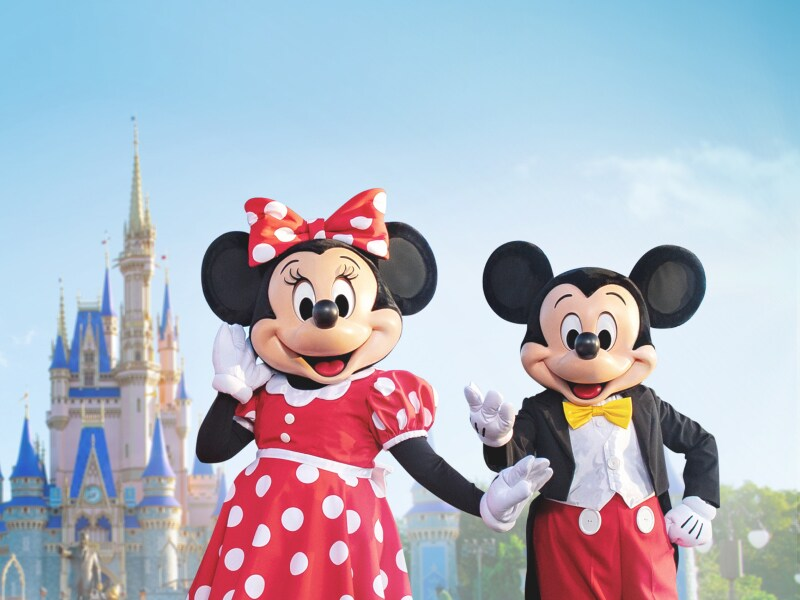

Image obtained from [here](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.disney.fr%2F&psig=AOvVaw0lRXBg3p-o_W_xN7arBP2z&ust=1730802586517000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCPjqgZ28wokDFQAAAAAdAAAAABBF)